In [ ]:
import SimpleITK as sitk
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [48]:
file1 = 'ITK_Images/head_affine_fix.png'
file2 = 'ITK_Images/head_affine_mov.png'
fixed = sitk.ReadImage(file1, sitk.sitkFloat32)
moving = sitk.ReadImage(file2, sitk.sitkFloat32)
# command that will allow us to print and save our cost function as it evolves.
def command_iteration(method):
    #print(f"Iteration{method.GetOptimizerIteration():3} : Cost = {method.GetMetricValue():10.5f} : {method.GetOptimizerPosition()}")
    print(f"Iteration{method.GetOptimizerIteration():3} : Cost = {method.GetMetricValue():10.5f}")

    cost.append(method.GetMetricValue())


In [117]:
cost =[]
tx = sitk.CenteredTransformInitializer(fixed,moving,sitk.AffineTransform(fixed.GetDimension()))

R = sitk.ImageRegistrationMethod()
R.SetMetricAsJointHistogramMutualInformation()
# R.SetOptimizerAsOnePlusOneEvolutionary(numberOfIterations = 500, initialRadius=1.1)
R.SetOptimizerAsRegularStepGradientDescent(4.0, 1e-6, 200)


R.SetOptimizerScalesFromPhysicalShift()
R.SetInitialTransform(sitk.AffineTransform(fixed.GetDimension()))
R.SetInterpolator(sitk.sitkLinear)
R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

outTx = R.Execute(fixed, moving)

print("-------")
print(outTx)
print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
print(f" Iteration: {R.GetOptimizerIteration()}")
print(f" Metric value: {R.GetMetricValue()}")
cost.append(R.GetMetricValue())
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fixed)
resampler.SetInterpolator(sitk.sitkLinear)
resampler.SetDefaultPixelValue(100)
resampler.SetTransform(outTx)

out = resampler.Execute(moving)
# simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
# simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
# cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)

Iteration  0 : Cost =   -0.38424
Iteration  1 : Cost =   -0.51065
Iteration  2 : Cost =   -0.61925
Iteration  3 : Cost =   -0.54640
Iteration  4 : Cost =   -0.59960
Iteration  5 : Cost =   -0.64833
Iteration  6 : Cost =   -0.66926
Iteration  7 : Cost =   -0.65279
Iteration  8 : Cost =   -0.65872
Iteration  9 : Cost =   -0.66669
Iteration 10 : Cost =   -0.67160
Iteration 11 : Cost =   -0.67553
Iteration 12 : Cost =   -0.67978
Iteration 13 : Cost =   -0.68445
Iteration 14 : Cost =   -0.68921
Iteration 15 : Cost =   -0.69653
Iteration 16 : Cost =   -0.70224
Iteration 17 : Cost =   -0.70769
Iteration 18 : Cost =   -0.70314
Iteration 19 : Cost =   -0.71596
Iteration 20 : Cost =   -0.71994
Iteration 21 : Cost =   -0.71557
Iteration 22 : Cost =   -0.72361
Iteration 23 : Cost =   -0.72995
Iteration 24 : Cost =   -0.73260
Iteration 25 : Cost =   -0.73358
Iteration 26 : Cost =   -0.73910
Iteration 27 : Cost =   -0.74106
Iteration 28 : Cost =   -0.74136
Iteration 29 : Cost =   -0.74226
Iteration 

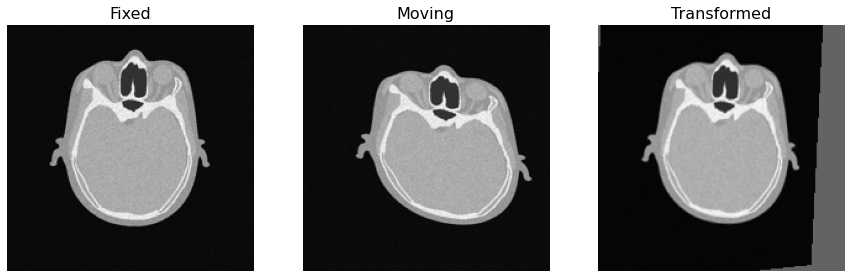

In [118]:
fig, axs = plt.subplots(1,3,figsize = (15,15))
img_fix = sitk.GetArrayFromImage(fixed)
img_mov = sitk.GetArrayFromImage(moving)
img_out = sitk.GetArrayFromImage(out)

axs[0].imshow(img_fix,cmap='gray'); axs[0].axis('off'); axs[0].set_title('Fixed',fontsize=16)
axs[1].imshow(img_mov,cmap='gray'); axs[1].axis('off'); axs[1].set_title('Moving',fontsize=16)
axs[2].imshow(img_out,cmap='gray'); axs[2].axis('off'); axs[2].set_title('Transformed',fontsize=16)
plt.show()

In [119]:
#help(R)
#help(R.SetOptimizerAsConjugateGradientLineSearch)

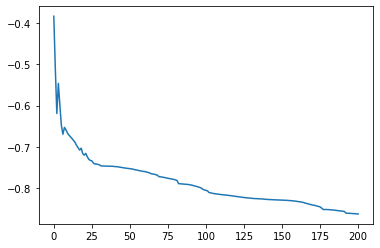

In [120]:
plt.plot(cost)
plt.show()

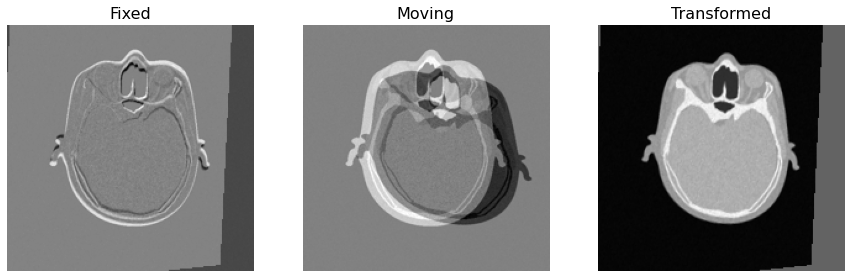

In [121]:
fig, axs = plt.subplots(1,3,figsize = (15,15))
img_fix = sitk.GetArrayFromImage(fixed)
img_mov = sitk.GetArrayFromImage(moving)
img_out = sitk.GetArrayFromImage(out)

axs[0].imshow(img_fix-img_out,cmap='gray'); axs[0].axis('off'); axs[0].set_title('Fixed',fontsize=16)
axs[1].imshow(img_fix-img_mov,cmap='gray'); axs[1].axis('off'); axs[1].set_title('Moving',fontsize=16)
axs[2].imshow(img_out,cmap='gray'); axs[2].axis('off'); axs[2].set_title('Transformed',fontsize=16)
plt.show()